## Q1

In [41]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [40]:
cancer = load_breast_cancer()

In [3]:
print(cancer["DESCR"])
print(cancer.feature_names)
print(cancer.target_names)
print(cancer.data)
print(cancer.data.shape)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [4]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data,
cancer.target)

In [5]:
mlp = MLPClassifier() #default iteration 200, default hidden layers 100

In [6]:
mlp.fit(X_train, y_train)

MLPClassifier()

In [7]:
print('Accuracy on the training subset:', (mlp.score(X_train,y_train)))

Accuracy on the training subset: 0.9342723004694836


In [8]:
print('Accuracy on the test subset: ',(mlp.score(X_test, y_test)))

Accuracy on the test subset:  0.9300699300699301


In [9]:
print('The maximum per each feature:\n{}'.format(cancer.data.max(axis=0)))

The maximum per each feature:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [10]:
from sklearn.preprocessing import StandardScaler #as preprocessing module

In [11]:
scaler = StandardScaler() # intantiate the object

In [12]:
X_train_scaled = scaler.fit(X_train).transform(X_train) #fit and transform the data
X_test_scaled = scaler.fit(X_test).transform(X_test)

In [13]:
mlp = MLPClassifier(max_iter=1000, random_state=42) #multi layer perceptron with 1000

In [14]:
mlp.fit(X_train_scaled, y_train)

MLPClassifier(max_iter=1000, random_state=42)

In [15]:
print('Accuracy on the training subset (Scaled Set):',(mlp.score(X_train_scaled, y_train)))
print('Accuracy on the test subset: (Scaled Set):',(mlp.score(X_test_scaled, y_test)))

Accuracy on the training subset (Scaled Set): 1.0
Accuracy on the test subset: (Scaled Set): 0.972027972027972


In [16]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=42)
mlp.fit(X_train_scaled, y_train)

MLPClassifier(alpha=1, max_iter=1000, random_state=42)

In [17]:
print('Accuracy on the training subset(Changed alpha):',(mlp.score(X_train_scaled, y_train)))
print('Accuracy on the test subset(Changed alpha): ',(mlp.score(X_test_scaled, y_test)))

Accuracy on the training subset(Changed alpha): 0.9929577464788732
Accuracy on the test subset(Changed alpha):  0.986013986013986


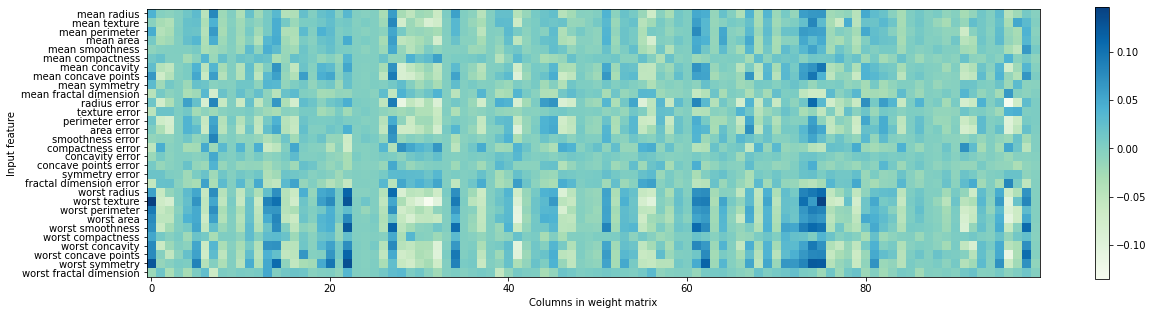

In [18]:
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='None', cmap='GnBu')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('Columns in weight matrix')
plt.ylabel('Input feature')
plt.colorbar()

## Q2

In [19]:
import pandas as pd
import numpy as np

In [21]:
Diabetes=pd.read_csv('diabetes.csv')
table1=np.mean(Diabetes,0)# finds out mean based on columns
table2=np.std(Diabetes,0)# finds out std deviation based on columns

In [22]:
inputData=Diabetes.iloc[:,:8] #creates dataframes based on columns 1 through 8
outputData=Diabetes.iloc[:,8] #creates sequence based on column 9

In [23]:
print(inputData.head())
print(outputData.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [24]:
from sklearn.neural_network import MLPClassifier

In [25]:
mlp = MLPClassifier()
mlp.fit(inputData,outputData)

MLPClassifier()

In [26]:
print('Score ',mlp.score(inputData,outputData)) #defines howwell the algorithm has performed

Score  0.7513020833333334


#### Model performance
#### Classification rate &#39;by hand&#39;
## Correctly classified

In [27]:
print('CORRECTLY CLASSIFIED',np.mean(mlp.predict(inputData)==outputData))

CORRECTLY CLASSIFIED 0.7513020833333334


## True positive

In [28]:
trueInput=Diabetes.loc[Diabetes['Outcome']==1].iloc[:,:8]
trueOutput=Diabetes.loc[Diabetes['Outcome']==1].iloc[:,8]

In [29]:
print('TRUE POSITVE RATE',np.mean(mlp.predict(trueInput)==trueOutput))

TRUE POSITVE RATE 0.373134328358209


## True negative

In [30]:
falseInput=Diabetes.loc[Diabetes['Outcome']==0].iloc[:,:8]
falseOutput=Diabetes.loc[Diabetes['Outcome']==0].iloc[:,8]

In [31]:
##True negative rate
print('TRUE NEGATIVE RATE',np.mean(mlp.predict(falseInput)==falseOutput))

TRUE NEGATIVE RATE 0.954


## Real vs predicted plot

In [32]:
import matplotlib.pyplot as plt

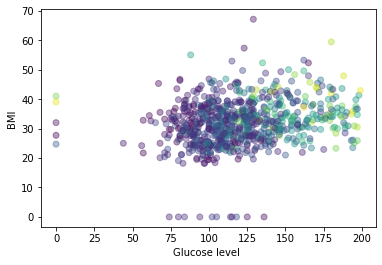

In [34]:
plt.figure()
plt.scatter(inputData.iloc[:,1],inputData.iloc[:,5],c=mlp.predict_proba(inputData)[:,1],alpha=0.4)
plt.xlabel('Glucose level ')
plt.ylabel('BMI')
plt.show()

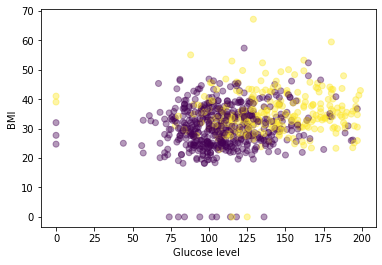

In [36]:
plt.figure()
plt.scatter(inputData.iloc[:,1],inputData.iloc[:,5],c=outputData,alpha=0.4)
plt.xlabel('Glucose level ')
plt.ylabel('BMI')
plt.show()